<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_12_transformer(train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 47.6 MB/s 
     |████████████████████████████████| 636 kB 59.2 MB/s 
     |████████████████████████████████| 895 kB 60.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# -*- coding: utf-8 -*-
"""7-12.transformer(train).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1G8-nu8jcRb4emVmE4Jdqszuhuynj7lAB
"""

# Commented out IPython magic to ensure Python compatibility.
# Transformer ChatBot : 학습 모듈
# 참고 : https://github.com/suyash/transformer
#
# 2020.06.07 : 조성현 (blog.naver.com/chunjein)
# ---------------------------------------------
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import pickle
%cd '/content/drive/MyDrive/머신러닝/Transformer'
from transformer import Transformer

/content/drive/MyDrive/머신러닝/Transformer


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd '/content/drive/MyDrive/Colab Notebooks'
MODEL_PATH = '/content/drive/MyDrive/머신러닝/Transformer/transformer_model.h5'
LOAD_MODEL = False

# 단어 목록 dict를 읽어온다.
with open('/content/drive/MyDrive/머신러닝/seq2seq/chatbot_voc.pkl', 'rb') as f:
    word2idx,  idx2word = pickle.load(f)
    
# 학습 데이터 : 인코딩, 디코딩 입력, 디코딩 출력을 읽어온다.
with open('/content/drive/MyDrive/머신러닝/seq2seq/chatbot_train.pkl', 'rb') as f:
    trainXE, trainXD, trainYD, _, _ = pickle.load(f)


In [ ]:
# Model
# -----
K.clear_session()
src = Input((None, ), dtype="int32", name="src")
tar = Input((None, ), dtype="int32", name="tar")

logits, enc_enc_attention, dec_dec_attention, enc_dec_attention = Transformer(
    num_layers=4,
    d_model=128,
    num_heads=8,
    d_ff=512,
    input_vocab_size=len(word2idx) + 2,
    target_vocab_size=len(word2idx) + 2,
    dropout_rate=0.1)(src, tar)

model = Model(inputs=[src, tar], outputs=logits)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

if LOAD_MODEL:
    model.load_weights(MODEL_PATH)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
src (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
transformer/encoder/embedding ( (None, None, 128)    1152256     src[0][0]                        
__________________________________________________________________________________________________
tf.math.multiply (TFOpLambda)   (None, None, 128)    0           transformer/encoder/embedding[0][
__________________________________________________________________________________________________
tf.compat.v1.shape_1 (TFOpLambd (3,)                 0           tf.math.multiply[0][0]           
______________________________________________________________________________________________

In [ ]:
# 학습 (teacher forcing)
# ----------------------
hist = model.fit([trainXE, trainXD], trainYD, batch_size = 512, epochs=100, shuffle=True)

Epoch 1/100
21/21 [==============================] - 15s 112ms/step - loss: 6.9989
Epoch 2/100
21/21 [==============================] - 2s 112ms/step - loss: 4.3009
Epoch 3/100
21/21 [==============================] - 2s 112ms/step - loss: 3.6497
Epoch 4/100
21/21 [==============================] - 2s 111ms/step - loss: 3.6241
Epoch 5/100
21/21 [==============================] - 2s 111ms/step - loss: 3.6169
Epoch 6/100
21/21 [==============================] - 2s 112ms/step - loss: 3.5028
Epoch 7/100
21/21 [==============================] - 2s 113ms/step - loss: 3.0449
Epoch 8/100
21/21 [==============================] - 2s 111ms/step - loss: 2.8388
Epoch 9/100
21/21 [==============================] - 2s 111ms/step - loss: 2.7608
Epoch 10/100
21/21 [==============================] - 2s 110ms/step - loss: 2.6945
Epoch 11/100
21/21 [==============================] - 2s 111ms/step - loss: 2.6181
Epoch 12/100
21/21 [==============================] - 2s 111ms/step - loss: 2.5464
Epoch 13/100

In [ ]:
# 학습 결과를 저장한다
model.save(MODEL_PATH)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


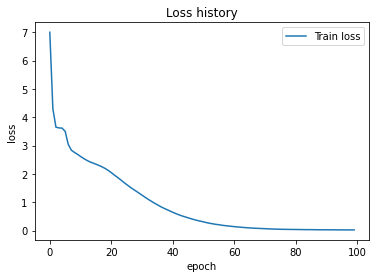

In [ ]:
# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()